# Statistical Learning

## Unsupervised Learning - Cluster Analysis


### k-means
 


In [ ]:
#### Installing and loading required libraries
if(!require(fpc)) install.packages("fpc")
if(!require(dbscan)) install.packages("dbscan")
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")


In [27]:
### Data: iris
iris <- iris

### run the k-means algorinth on the data using three clusters
kmodel <- kmeans(x = as.matrix(iris[,1:4]), centers = 3)


In [4]:
table(kmodel$cluster)


 1  2  3 
33 21 96 

In [5]:
table(cluster=kmodel$cluster, species=iris$Species)

       species
cluster setosa versicolor virginica
      1     33          0         0
      2     17          4         0
      3      0         46        50

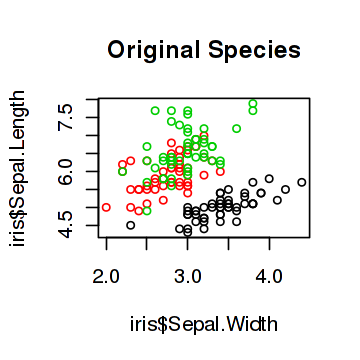

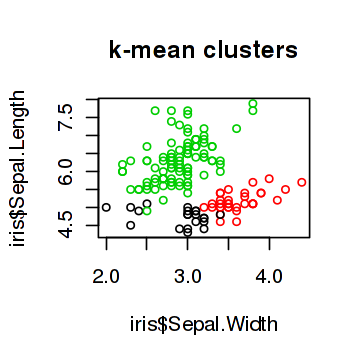

In [28]:
options(repr.plot.width = 3, repr.plot.height = 3)

plot(iris$Sepal.Length ~ iris$Sepal.Width, col=iris$Species, main="Original Species", cex=0.7)
plot(iris$Sepal.Length ~ iris$Sepal.Width, col=kmodel$cluster, main="k-mean clusters", cex=0.7)

The algorithm of k-means is sensible to the initially selected random points. By changing the starting points (nstart) we can get a better or worst model:

In [14]:
kmodel <- kmeans(x = as.matrix(iris[,1:4]), centers = 3, nstart=30)
table(kmodel$cluster)


 1  2  3 
38 62 50 

In [15]:
table(cluster=kmodel$cluster, species=iris$Species)

       species
cluster setosa versicolor virginica
      1      0          2        36
      2      0         48        14
      3     50          0         0

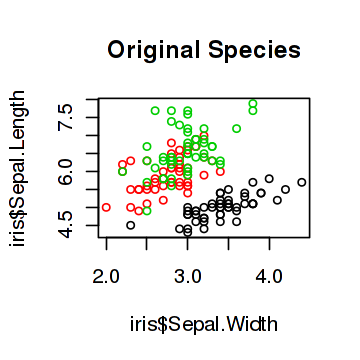

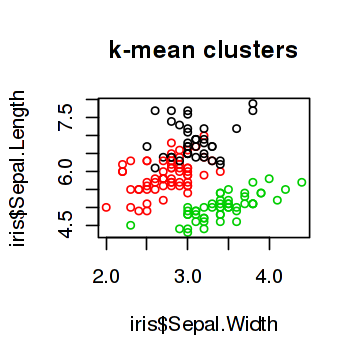

In [25]:
plot(iris$Sepal.Length ~ iris$Sepal.Width, col=iris$Species, main="Original Species", cex=0.7)
plot(iris$Sepal.Length ~ iris$Sepal.Width, col=kmodel$cluster, main="k-mean clusters", cex=0.7)

### Hierarchical clustering
 


In [18]:
hcmodel <- hclust(d=dist(as.matrix(iris[,1:4])))
hcmodel


Call:
hclust(d = dist(as.matrix(iris[, 1:4])))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 150 


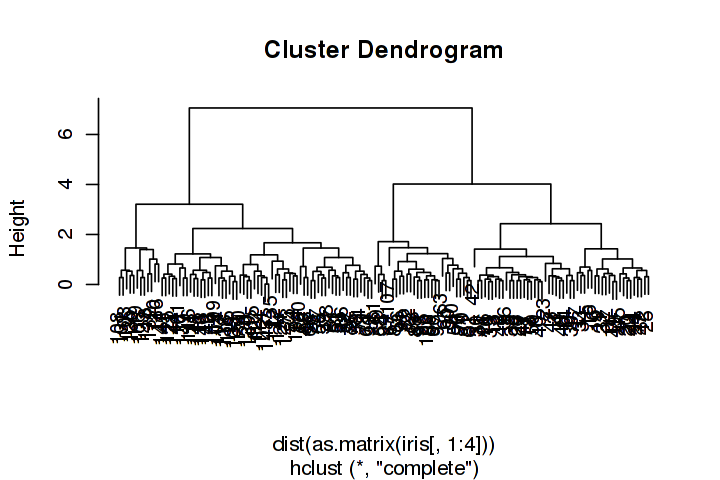

In [71]:
options(repr.plot.width = 6, repr.plot.height = 4)
plot(hcmodel)

In [39]:
hcmod_clusters <- cutree(hcmodel, 3)
table(hcmod_clusters)

table(iris$Species, clusters=hcmod_clusters)

hcmod_clusters
 1  2  3 
50 72 28 

            clusters
              1  2  3
  setosa     50  0  0
  versicolor  0 23 27
  virginica   0 49  1

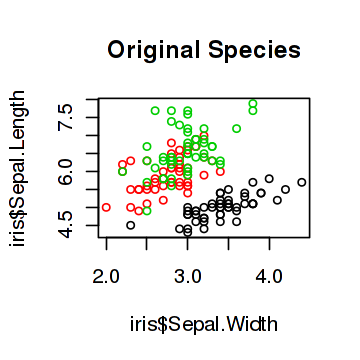

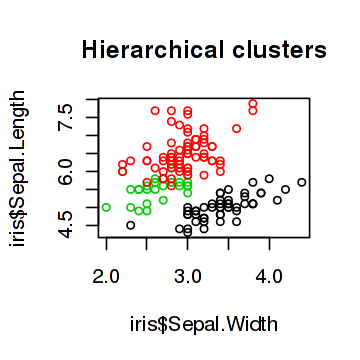

In [30]:
options(repr.plot.width = 3, repr.plot.height = 3)

plot(iris$Sepal.Length ~ iris$Sepal.Width, col=iris$Species, main="Original Species", cex=0.7)
plot(iris$Sepal.Length ~ iris$Sepal.Width, col=hcmod_clusters, main="Hierarchical clusters", cex=0.7)

### Gaussian mixture models
 


In [33]:
library(mclust)

### Mclust: implementation of gaussian mixture model
mcl_model <- Mclust(iris[, 1:4], 3)

summary(mcl_model)


----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VEV (ellipsoidal, equal shape) model with 3 components:

 log.likelihood   n df       BIC       ICL
      -186.0736 150 38 -562.5514 -566.4577

Clustering table:
 1  2  3 
50 45 55 

In [36]:
table(iris$Species, clusters=mcl_model$classification)

            clusters
              1  2  3
  setosa     50  0  0
  versicolor  0 45  5
  virginica   0  0 50

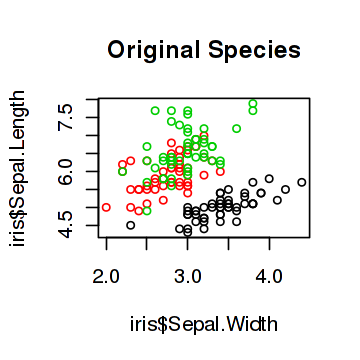

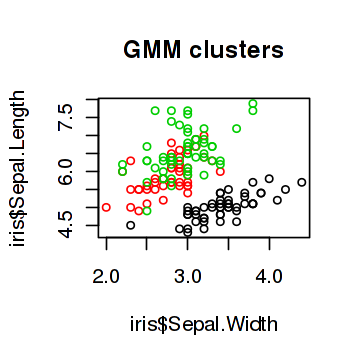

In [38]:
options(repr.plot.width = 3, repr.plot.height = 3)

plot(iris$Sepal.Length ~ iris$Sepal.Width, col=iris$Species, main="Original Species", cex=0.7)
plot(iris$Sepal.Length ~ iris$Sepal.Width, col=mcl_model$classification, main="GMM clusters", cex=0.7)

### DBSCAN
 

In [64]:
### install.packages("dbscan")
library("fpc")
library("dbscan")


### create a dbscan cluster
dbscan_mod <- dbscan(iris[,1:4],eps=0.5, MinPts = 10 )

In [65]:
summary(dbscan_mod$cluster)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    1.00    1.28    2.00    2.00 

In [66]:
table(iris$Species, clusters=dbscan_mod$cluster)

            clusters
              0  1  2
  setosa      2 48  0
  versicolor  6  0 44
  virginica  22  0 28

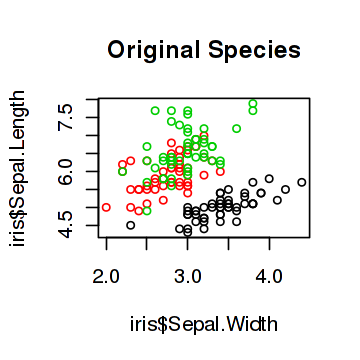

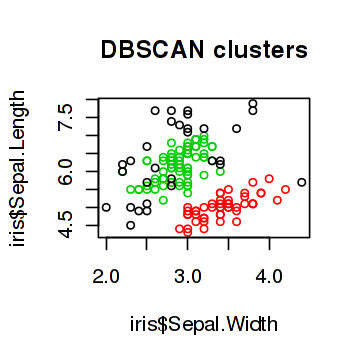

In [68]:
options(repr.plot.width = 3, repr.plot.height = 3)

plot(iris$Sepal.Length ~ iris$Sepal.Width, col=iris$Species, main="Original Species", cex=0.7)
plot(iris$Sepal.Length ~ iris$Sepal.Width, col=dbscan_mod$cluster+1, main="DBSCAN clusters", cex=0.7)

## DBSCAN and figure dataset
 
DBSCAN is specially useful when trying to capture figure patterns (e.g. in pictures, maps or drawings).
An example can be obtained from the multishapes dataset on the factoextra package

In [55]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")

library(factoextra)

Loading required package: devtools
from URL https://api.github.com/repos/kassambara/factoextra/zipball/master
Installing factoextra
Installing dendextend
Installing fpc
Installing kernlab
'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmpIe6UfF/devtools26b957ea1201/kernlab'  \
  --library='/home/tomas/R/x86_64-pc-linux-gnu-library/3.4' --install-tests 

Installing mclust
'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmpIe6UfF/devtools26b962b40ef4/mclust'  \
  --library='/home/tomas/R/x86_64-pc-linux-gnu-library/3.4' --install-tests 

Reloading installed mclust
Package 'mclust' version 5.4.1
Type 'citation("mclust")' for citing this R package in publications.
Installing mvtnorm
'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmpIe6UfF/devtools26b9482a7345/mvtnorm'  \
  --library='/home/tomas/R/x86_64-pc-linux-gnu-library/3.4


'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmpIe6UfF/devtools26b93d7e1d59/dplyr'  \
  --library='/home/tomas/R/x86_64-pc-linux-gnu-library/3.4' --install-tests 

Installing ggrepel
'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmpIe6UfF/devtools26b91411d2c5/ggrepel'  \
  --library='/home/tomas/R/x86_64-pc-linux-gnu-library/3.4' --install-tests 

Installing ggsci
'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmpIe6UfF/devtools26b97c8d4b79/ggsci'  \
  --library='/home/tomas/R/x86_64-pc-linux-gnu-library/3.4' --install-tests 

Installing ggsignif
'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL '/tmp/RtmpIe6UfF/devtools26b97fe9d1f5/ggsignif'  \
  --library='/home/tomas/R/x86_64-pc-linux-gnu-library/3.4' --install-tests 

Skipping install of 'glue' from a cran remote, the SHA

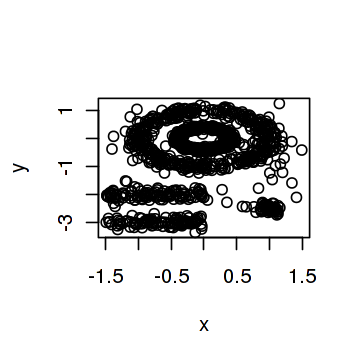

In [56]:
df <- multishapes[, 1:2]
set.seed(123)

plot(df)

In [57]:
dbs_mod <- dbscan(df, eps = 0.15, MinPts = 5)plot(df,col=dbs_mod$cluster)

Warning message in dbscan(df, eps = 0.15, MinPts = 5):
“converting argument MinPts (fpc) to minPts (dbscan)!”

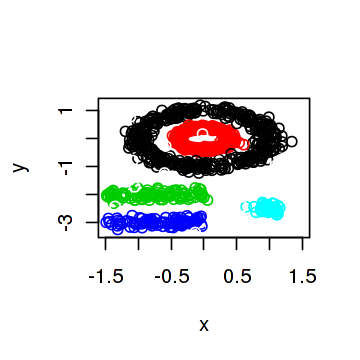

In [70]:
plot(df,col=dbs_mod$cluster)

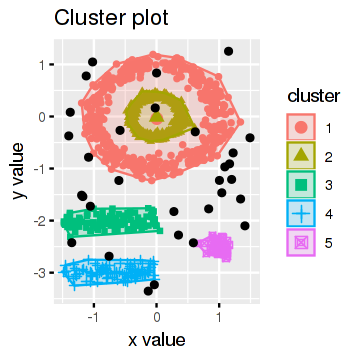

In [59]:
fviz_cluster(dbs_mod, df, stand = FALSE, geom = "point")

# Calculation of the optimal number of clusters
 
First we will use the empiric calculation:  k ≈ √n/2

In [75]:
k <- sqrt(nrow(iris)/2)

print(paste("The optimal number of clusters based on the empirical method is:",k))

[1] "The optimal number of clusters based on the empirical method is: 8.66025403784439"


Now we will use the elbow method:

In [78]:
### calculate the initial variance for the whole dataset (one cluster)
wss <- (nrow(iris)-1)*sum(apply(iris[,1:4],2,var))
wss


[1] 681.3706

In [79]:
### iterate for 2 to 15 clusters and calculate the sum of the within variance for each iteration
for (i in 2:15) wss[i] <- sum(kmeans(iris[,1:4],centers=i)$withinss)

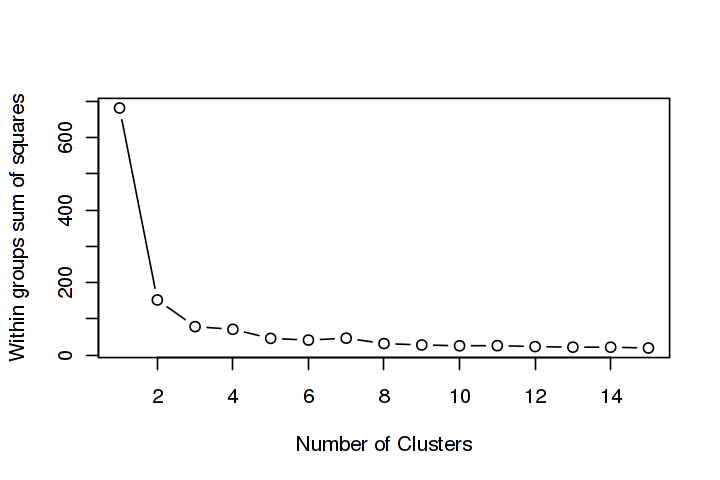

In [81]:
### Now plot the elbow plot
plot(1:15, wss, type="b", xlab="Number of Clusters",ylab="Within groups sum of squares")

Now we will proceed with the NbClust algorithm:

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


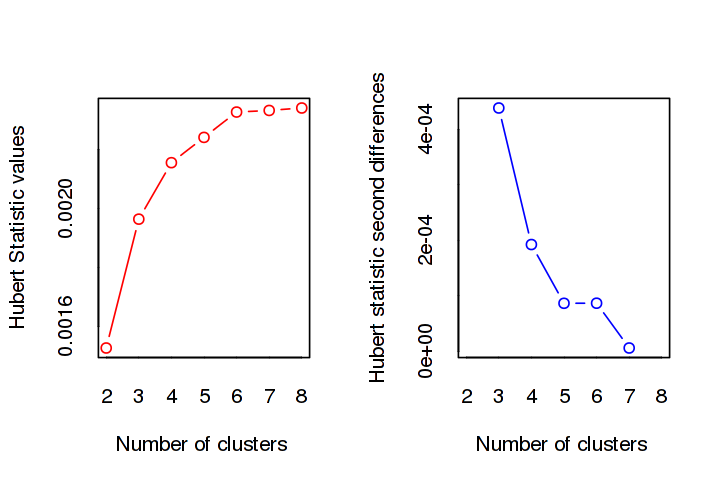

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 2 proposed 2 as the best number of clusters 
* 13 proposed 3 as the best number of clusters 
* 5 proposed 4 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


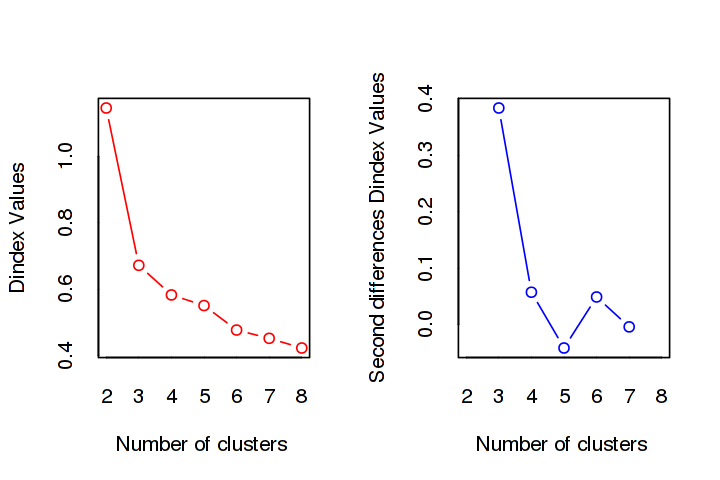

In [83]:
library(NbClust)

res <- NbClust(iris[,1:4], distance = "euclidean", min.nc=2, max.nc=8, method = "complete")


In [84]:
res$All.CriticalValues

,CritValue_Duda,CritValue_PseudoT2,Fvalue_Beale
2,0.6121,48.1694,0.0000
3,0.6027,46.1391,0.1134
4,0.5551,38.4707,0.1704
5,0.5800,42.0003,0.0983
6,0.4590,30.6444,0.1373
7,0.5131,34.1652,0.2822
8,0.4284,29.3527,1.0000


In [85]:
t(res$All.index)

,2,3,4,5,6,7,8
KL,1.9652,5.3598,54.0377,0.0263,7.1653,0.5308,2.4071
CH,280.8392,485.9050,495.1816,414.3925,455.4931,423.7198,414.7146
Hartigan,240.7478,68.8363,16.4167,51.1371,16.8076,20.2960,4.4653
CCC,30.4441,35.8668,35.6036,33.0698,33.9870,32.9063,32.4873
Scott,933.9084,1210.7629,1346.7582,1387.9419,1506.5585,1560.0089,1628.7974
Marriot,977603.9558,347351.7594,249402.2571,296129.1731,193380.8832,184311.4277,152185.4700
TrCovW,6868.5401,304.1791,135.7432,121.5044,96.9908,93.2005,60.9393
TraceW,235.1531,89.5250,60.9730,54.8099,40.5198,36.2847,31.7749
Friedman,715.2826,804.1705,955.5312,991.9852,1070.1736,1171.9307,1251.1704
Rubin,40.5663,106.5545,156.4512,174.0431,235.4228,262.9011,300.2146


In [87]:
t(res$Best.nc)

,Number_clusters,Value_Index
KL,4,54.0377
CH,4,495.1816
Hartigan,3,171.9115
CCC,3,35.8668
Scott,3,276.8545
Marriot,3,532302.6940
TrCovW,3,6564.3610
TraceW,3,117.0760
Friedman,4,151.3607
Rubin,6,-33.9014


## External Evaluation of the clusters

Pairwise measures - Confusion matrix ( TP,TN,FP,FN )
- Jaccard index:  TP/(TP+FP+FN) 
- Rand measure:   TP+TN/(TP+FP+FN+TN)
- Fowlkes–Mallows index:   TP/√((TP+FP)(TP+FN)) 



In [89]:
### Confission matrix for kmeans
table(model=kmodel$cluster,observed=iris$Species)

     observed
model setosa versicolor virginica
    1     17          4         0
    2     33          0         0
    3      0         46        50

In [93]:
library('clusteval')

jaccard <- cluster_similarity(iris$Species, kmodel$cluster, similarity="jaccard", method="independence")
rand <- cluster_similarity(iris$Species, kmodel$cluster, similarity="rand", method="independence")

print(paste("Jaccard similarity index:",jaccard))
print(paste("Rand similarity measure:",rand))

[1] "Jaccard similarity index: 0.484858513983121"
[1] "Rand similarity measure: 0.721431767337808"


We can also use the clues package for the comparisson between cluster methods. Available indices are: “Rand”, “HA” (Hubert and Arabie’s adjusted Rand index), “MA” (Morey and Agresti’s adjusted Rand index), “FM” (Fowlkes and Mallows’s index), “Jaccard” (Jaccard index)

In [124]:
library(clues)

# k-means: kmodel$cluster
# hierarchical: hcmod_clusters
# Gaussian: mcl_model$classification
# DBSCAN: dbscan_mod$cluster
# Correct Species: iris$Species

clusters <- c("kmean","hierarchical","gaussian","dbscan","Species")

c1_2 <- adjustedRand(kmodel$cluster, hcmod_clusters)
c1_3 <- adjustedRand(kmodel$cluster, mcl_model$classification)
c1_4 <- adjustedRand(kmodel$cluster, dbscan_mod$cluster)
c2_3 <- adjustedRand(hcmod_clusters, mcl_model$classification)
c2_4 <- adjustedRand(hcmod_clusters, dbscan_mod$cluster)
c3_4 <- adjustedRand(mcl_model$classification, dbscan_mod$cluster)

In [123]:
print(paste(clusters[1],"vs",clusters[2]))
c1_2
print(paste(clusters[1],"vs",clusters[3]))
c1_3
print(paste(clusters[1],"vs",clusters[4]))
c1_4
print(paste(clusters[2],"vs",clusters[3]))
c2_3
print(paste(clusters[2],"vs",clusters[4]))
c2_4
print(paste(clusters[3],"vs",clusters[4]))
c3_4

[1] "kmean vs hierarchical"


Rand        HA        MA        FM   Jaccard 
0.7804922 0.5550910 0.5590258 0.7460462 0.5880772

[1] "kmean vs gaussian"


Rand        HA        MA        FM   Jaccard 
0.7272483 0.4447789 0.4500300 0.6719394 0.4939399

[1] "kmean vs dbscan"


Rand        HA        MA        FM   Jaccard 
0.7761969 0.5462145 0.5502519 0.7402410 0.5802987

[1] "hierarchical vs gaussian"


Rand        HA        MA        FM   Jaccard 
0.8622819 0.6985274 0.7021780 0.8055486 0.6724835

[1] "hierarchical vs dbscan"


Rand        HA        MA        FM   Jaccard 
0.7641163 0.4942502 0.4999174 0.6815736 0.5169507

[1] "gaussian vs dbscan"


Rand        HA        MA        FM   Jaccard 
0.7778076 0.5123177 0.5182719 0.6834222 0.5179577

## Internal evaluation of clusters

In [129]:
## Dunn
library(clValid)
dist_dunn <- dist(as.matrix(iris[,1:4]), method = "euclidean") 
dunn_value <- dunn(distance = dist_dunn, clusters = kmodel$cluster)  
dunn_value

Loading required package: cluster


[1] 0.05383819

In [150]:
## silhuete
library(clues)

tt <- get_Silhouette(as.matrix(iris[,1:4]), kmodel$cluster, disMethod = "Euclidean")
tt$avg.s

[1] 0.517263

# Principal Component Analysis
 


In [131]:
iris.pca <- prcomp(as.matrix(iris[,1:4]))
iris.pca

Standard deviations (1, .., p=4):
[1] 2.0562689 0.4926162 0.2796596 0.1543862

Rotation (n x k) = (4 x 4):
                     PC1         PC2         PC3        PC4
Sepal.Length  0.36138659 -0.65658877  0.58202985  0.3154872
Sepal.Width  -0.08452251 -0.73016143 -0.59791083 -0.3197231
Petal.Length  0.85667061  0.17337266 -0.07623608 -0.4798390
Petal.Width   0.35828920  0.07548102 -0.54583143  0.7536574

In [137]:
### Variance of the principal components
pca.var <- iris.pca$sdev^2

### Percent of the variability attributed to each principal component
pca.varpct <- pca.var/sum(pca.var)


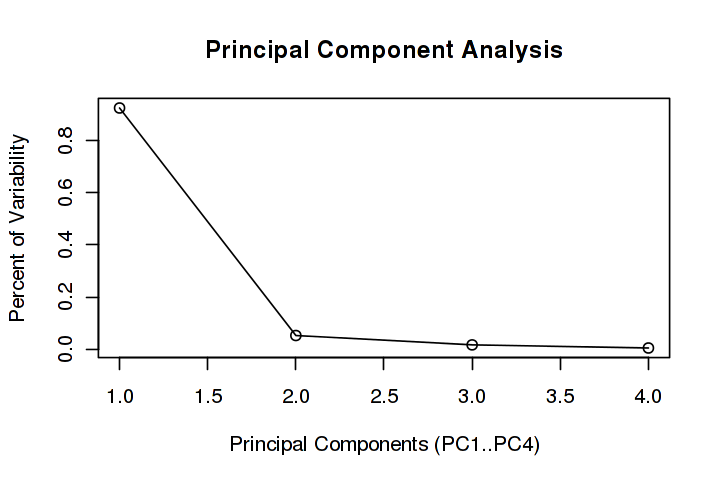

In [134]:
### Variability for each of the principal components
plot(pca.varpct, type="o", xlab="Principal Components (PC1..PC4)", 
     ylab="Percent of Variability",main="Principal Component Analysis")

The graph shows that the two first components account for most of the variability (higher than 90%).

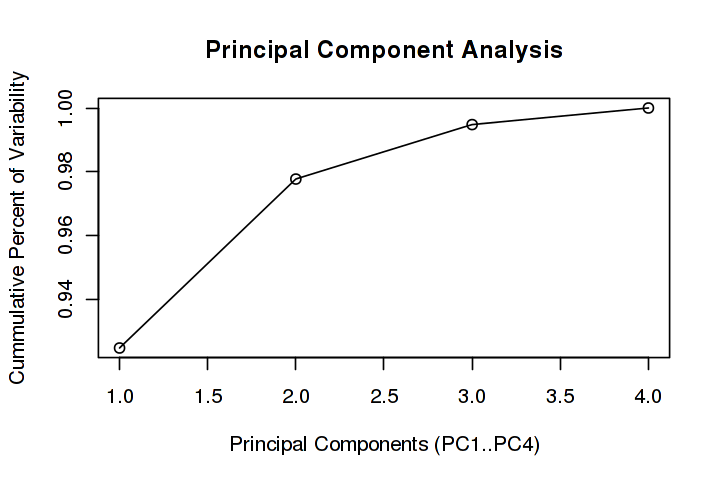

In [136]:
## Cummulative sum of the variability percent
plot(cumsum(pca.varpct), type="o", xlab="Principal Components (PC1..PC4)", 
     ylab="Cummulative Percent of Variability",main="Principal Component Analysis")

The plot of the cummulative sum of the variance percent shows that the first two principal components account for 98% of the variance! 

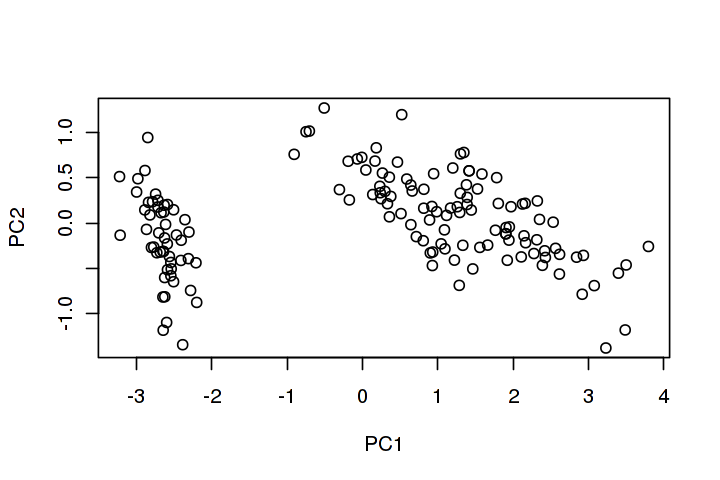

In [140]:
### Plot of the first two components
plot(iris.pca$x)

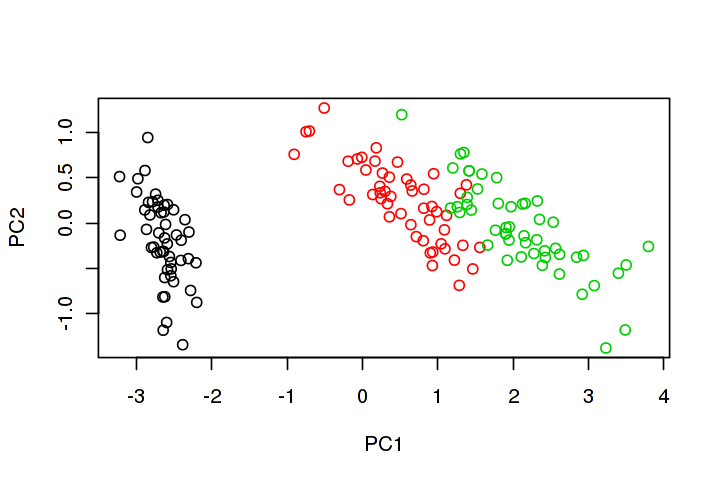

In [141]:
### Plot of the first two components coloring by species
plot(iris.pca$x, col=iris$Species)

As we can appreciate, the PCA has the capacity to discriminate among the different species.
We can now search for the correlation between PC1 and PC2, and the iris variables:

In [149]:
pc12 <- data.frame(iris.pca$x)
head(pc12)


PC1,PC2,PC3,PC4
-2.684126,-0.3193972,0.02791483,0.002262437
-2.714142,0.1770012,0.21046427,0.099026550
-2.888991,0.1449494,-0.01790026,0.019968390
-2.745343,0.3182990,-0.03155937,-0.075575817
-2.728717,-0.3267545,-0.09007924,-0.061258593
-2.280860,-0.7413304,-0.16867766,-0.024200858


In [148]:
library("Hmisc")

rcorr(as.matrix(cbind(iris[,1:4], pc12[,1:2])))

             Sepal.Length Sepal.Width Petal.Length Petal.Width   PC1   PC2
Sepal.Length         1.00       -0.12         0.87        0.82  0.90 -0.39
Sepal.Width         -0.12        1.00        -0.43       -0.37 -0.40 -0.83
Petal.Length         0.87       -0.43         1.00        0.96  1.00  0.05
Petal.Width          0.82       -0.37         0.96        1.00  0.97  0.05
PC1                  0.90       -0.40         1.00        0.97  1.00  0.00
PC2                 -0.39       -0.83         0.05        0.05  0.00  1.00

n= 150 


P
             Sepal.Length Sepal.Width Petal.Length Petal.Width PC1    PC2   
Sepal.Length              0.1519      0.0000       0.0000      0.0000 0.0000
Sepal.Width  0.1519                   0.0000       0.0000      0.0000 0.0000
Petal.Length 0.0000       0.0000                   0.0000      0.0000 0.5566
Petal.Width  0.0000       0.0000      0.0000                   0.0000 0.5533
PC1          0.0000       0.0000      0.0000       0.0000             1.0000


The correlation matrix shows that the first component (C1) has high correlation with all the variables, while the second component (C2) only is correlated Sepal Length and Width.